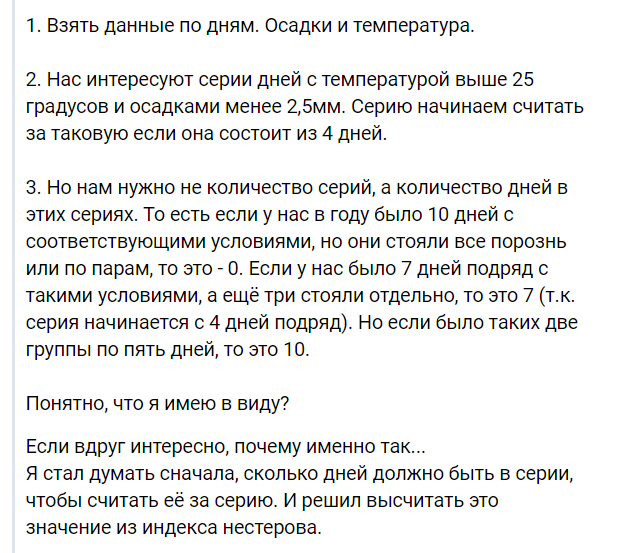

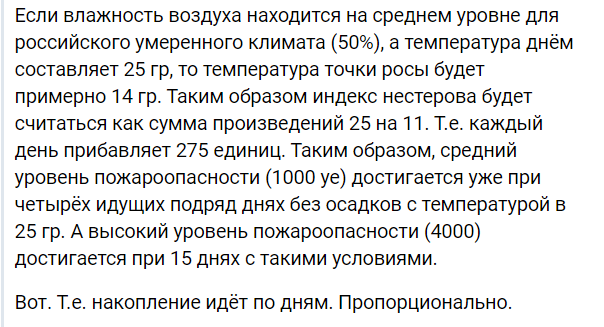

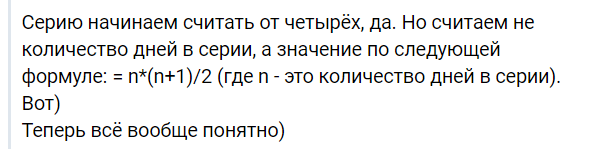

Данные беру 2008-2019 как в старых тз

In [1]:
import pandas as pd
import numpy as np

In [2]:
stations = pd.read_csv("stations.csv") 
stations = stations[["Код станции", "Код региона"]]
# фрагмент 
stations.head()

,Код станции,Код региона
0,20046,29
1,20069,24
2,20087,24
3,20107,0
4,20289,24


ВНИМАНИЕ функция чтения таблиц работает некоректно, и месяца 10 11 12 становятся 0 1 2. Есть вариант исправить это, добавив в таблицу строчку заголовков (или просто незначащую строку, пример на фото) чтоб она какбы забивала еще один знак и он потом не терялся. Я проверила, это работает (красным подчеркнут ключевой момент зачем мы это затеваем)
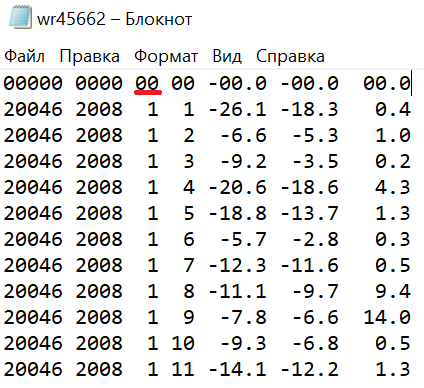
однако в нашем случае нам не нужно ни месяцев 1 2, ни 10 11 12, нам нужны только 7 8. Так что я не обращаю на это внимания и все (в таблице этой нулевой строки нет!)

In [3]:
data = pd.read_fwf("days_data\wr45662.txt", header = None)
data.columns = ['code_station', 'year', 'month', 'day', 'average_temp', 'max_temp', 'rain']
data.head()

,code_station,year,month,day,average_temp,max_temp,rain
0,20046,2008,1,1,-26.1,-18.3,0.4
1,20046,2008,1,2,-6.6,-5.3,1.0
2,20046,2008,1,3,-9.2,-3.5,0.2
3,20046,2008,1,4,-20.6,-18.6,4.3
4,20046,2008,1,5,-18.8,-13.7,1.3


In [4]:
# убираем cnолбец дней
july_data = data[data['month'] == 7].drop(columns=['month', 'day']) 
august_data = data[data['month'] == 8].drop(columns=['month', 'day'])
august_data

,code_station,year,average_temp,max_temp,rain
213,20046,2008,0.7,1.3,0.0
214,20046,2008,1.9,3.0,0.0
215,20046,2008,1.2,2.2,0.0
216,20046,2008,0.8,2.2,0.9
217,20046,2008,-0.5,0.4,0.4
...,...,...,...,...,...
2319908,38927,2015,26.3,33.5,0.0
2319909,38927,2015,25.6,33.3,0.0
2319910,38927,2015,24.3,32.1,0.0
2319911,38927,2015,24.1,32.1,0.0


In [5]:
min_average_temp = 25   # градусов
min_max_temp = 25
max_rain = 2.5  # миллиметров
len_of_ser = 4  # длина серии

Нам нужно получить для каждой станции и месяца число. То есть две таблички (июль август), строк сколько станций * лет, три колонны

In [20]:
ave_temp = []
max_temp = []
rain = []
num = july_data.groupby(by=["code_station", "year"]).apply(lambda x: foo(x))

In [18]:
def foo(df):
    # подсчитываем серии для трех колонок
    m1 = df["average_temp"] > min_average_temp
    m2 = df["max_temp"] > min_max_temp
    m3 = df["rain"] < max_rain
    ave_temp.append(count_days(m1))
    max_temp.append(count_days(m2))
    rain.append(count_days(m3))
    return count_days(m1), count_days(m2), count_days(m3)

def count_days(my_mask): # очень специфичный способ подсчета, зато работает
    a = "".join(list(my_mask.replace([True, False], ['t', 'f'])))
    a = a.split("f")
    a = sum([len(x) for x in a if len(x) >= len_of_ser])
    return a

мы получили данные, теперь хочу положить их в таблички, ровно такие же как были с температурой